# Ormuco Programming Test 
## Friday November 29th, 2019
### Created by Amanda Boatswain Jacques

## Question A 
Your goal for this question is to write a program that accepts two lines (x1,x2) and (x3,x4) on the x-axis and returns whether they overlap. As an example, (1,5) and (2,6) overlaps but not (1,5) and (6,8).

Assumptions for this question:
  - There are no library restrictions
  - A line overlaps with another if they have at least one point in common

In [1]:
#import necessary libraries
import numpy as np  # numerical python
%matplotlib inline 

# generate the lines
(x1, x2) = (1, 5)
(x3, x4) = (2, 6)
(y) = (0, 0)  # the lines are flattened on the x-axis and therefore have a y value of 0. 

We can even plot the lines to see what they look like beforehand. 

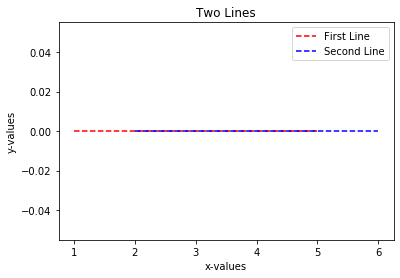

In [2]:
from matplotlib import pyplot as plt # python plotting library

# plot the lines to see what they look like, we will use dashed lines so that the overlap (if present) is visible.
plt.plot((x1, x2), (y), "r--", (x3, x4), (y), "b--")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.title("Two Lines")
plt.legend(['First Line', 'Second Line'], loc=1)
plt.show()

Next, we create a list of all the points on each of the two lines. 

In [3]:
# find the point coordinates of all the points on the line
def find_coordinates(x0, xN):
    # map the points to a list and then convert them to a set
    coordinates = set([i for i in range(x0, xN+1)])
    return coordinates

# create point sets for the first line and the second line
line1 = find_coordinates(x1, x2)
line2 = find_coordinates(x3, x4)

print("Points on the first line:", line1)
print("Points on the second line:", line2)

Points on the first line: {1, 2, 3, 4, 5}
Points on the second line: {2, 3, 4, 5, 6}


### Check if the lines overlap: 
If the lines overlap, they must have at least 1 point in common. 

In [4]:
# check if there are any common elements in the first or second line
def check_overlap(line1, line2):
    if (line1 & line2):
        print("These lines overlap at: ", (line1&line2))
    else:
        print("These lines do not overlap.")

check_overlap(line1, line2)

These lines overlap at:  {2, 3, 4, 5}


## Question B 
The goal of this question is to write a software library that accepts 2 version
string as input and returns whether one is greater than, equal, or less than the
other. As an example: “1.2” is greater than “1.1”. Please provide all test cases
you could think of.

Assumptions for this question:
 - There are no library restrictions

First, we will define the strings we will use to do our comparison. 

In [5]:
# define the variables we will be using 
seperator = "." # the version levels are seperated by a period. 
string1 = "3.4.2"
string2 = "2.4.1"

### Create a version comparison method: 
Next, we will define a function to compare the two version strings. The function will loop through the various numbers in the string and compare the numbers at equal levels. If two version strings have the same number at a given level, the function will move to the subsequent level.  

In [6]:
def compare_versions(string1, string2, seperator= "."):
    # first load the strings and then seperate the individual numbers into a list by
    # using the split function
    string1 = string1.split(seperator)
    string2 = string2.split(seperator)

    # loop through all the version levels
    for level in range(0, len(string1)):
        # if the current two levels are equal, then continue in the loop
        if string1[level] == string2[level]:
            continue
            # if all the levels are the same, then return that the versions are equal
            return print("Version %s is equal to version %s. " %(seperator.join(string1), seperator.join(string2)))


        # if the current level of string1 one is higher than string 2, return
        # string 1
        elif string1[level] > string2[level]:
            return print("Version %s is greater than %s. " %(seperator.join(string1), seperator.join(string2)))
            break
        # else, return string2
        else:
            return print("Version %s is greater than %s. " %(seperator.join(string2), seperator.join(string1)))
            break

Finally, we test the function on the strings we created earlier: 

In [7]:
compare_versions(string1, string2)

Version 3.4.2 is greater than 2.4.1. 


Another cool way to answer this question: Use python tuples! There is built in logic when comparing them.


In [18]:
def compare_tuples(string1, string2, seperator = "."):
    # convert the strings to tuples
    string1 = tuple(string1.split(seperator))
    string2 = tuple(string2.split(seperator))

    # compare the tuples to each other and return whichever one is greater
    if (string1 == string2):
        return print("Version %s is equal to version %s. " %(seperator.join(string1), seperator.join(string2)))
    elif string1 > string2:
        return print("Version %s is greater than %s. " %(seperator.join(string1), seperator.join(string2)))
    else:
        return print("Version %s is greater than %s. " %(seperator.join(string2), seperator.join(string1)))
    
# Define some new strings and try out the tuple method next  
string3 = "4.4.2.0"
string4 = "2.4.1.3"
    
compare_tuples(string3, string4)

Version 4.4.2.0 is greater than 2.4.1.3. 


## Question C
Dealing with network issues everyday, latency is our biggest problem. Thus, your challenge is to write a new Geo Distributed LRU (Least Recently Used) cache with time expiration. This library will be used extensively by many of our services so it needs to meet the following criteria:

    1 - Simplicity. Integration needs to be dead simple.
    2 - Resilient to network failures or crashes.
    3 - Near real time replication of data across Geolocation. Writes need to be in real time.
    4 - Data consistency across regions
    5 - Locality of reference, data should almost always be available from the closest region
    6 - Flexible Schema
    7 - Cache can expire 

Assumptions for this question:
 - There are no library restrictions

An least recently used (LRU) cache is a way of speeding up a program by storing 
data in memory. To implement an LRU cache we need two data structures:

1- A Doubly linked list (DLL) that will serve as a Queue. In a DLL, each node has
data and both a next and previous pointer. The maximum size of the queue  will
have a number of nodes equal to the cache size. The most recently used reference
will be near the front of the list(head) and the LRU reference will be placed near the
end (tail).

2- A key or hash to locate the corresponding queue entry and access its data.

If we reference an item that is in memory, we will need to detach the node from the
list and then move it to the front of the queue. If it is not in memory, we will add
it to the front of the list and remove the LRU reference and the end of the
queue if all nodes in the queue are already occupied. 

This code is primarily based on the code in this github repository: 
https://github.com/ncorbuk/Python-LRU-Cache, with some modifications made to add
extra functionality.


In [10]:
# import necessary libraries
import time
from datetime import datetime

First, we create a node object class. The node will have multiple dynamic properties including a key we can use to locate it in the cache, data (a value we want to store), a pointer to the previous node and a pointer to the node after it.  

In [11]:
# create a Node class
class Node:
    # Create a new node, by default all values will be set to None
    def __init__(self, key, data=None):
        self.key = key      # access the node using its key
        self.data = data    # data contained within the node
        self.next = None    # set the next pointer
        self.prev = None    # set the previous pointer
        self.timestamp = datetime.now() # add a timestamp for time expiration

Next, we create an LRU cache class. It is primarily a DLL with a set of functions for manipulating the nodes within it. The main methods are: _ _call_ _, _insert, _remove, _modifyQueue and _verifyNode. 

In [12]:
class LRUCache:
    cache_limit = None
    verbose = False

    def __init__(self, func, time_delta=1):
        # set the number of nodes in the queue
        # set the function that will be using the cache decorator
        self.func = func
        # dictionary (or hash) holding the items in the cache
        self.cache = {}
        # maximum time an item can stay in the cache before it expires in seconds
        self.time_delta = time_delta

        # create the head (first) node and tail (last) node and link them together
        self.head = Node(key=0, data=0)
        self.tail = Node(key=0, data=0)
        self.head.next = self.tail
        self.tail.prev = self.head

    def __call__(self, *args, **kwargs):
        
        """We want to treat this instance of a class (aka Objects), as if if were a function: to achieve this we 
        pass them to other methods/functions and call them. In order to achieve this, the __call__ class function 
        has to be specialized. We want this function to be used as a decorator for another function. """
        
        # if the answer is in the cache, pull results from the queue and place the
        # newly accessed value at the head
        if args in self.cache:
            self._modifyQueue(args) # place new value at list head
            # print the cache to screen 
            if self.verbose == True: 
                print(f'Cached...{args}\n result: {self.cache[args]}\nCache: {self.cache}')
                # return the result saved in the cache 
            return self.cache[args]

        # if the cache limit is exceeded:
        if self.cache_limit is not None:
            if len(self.cache) >= self.cache_limit:
                #remove the LRU item from the queue
                next = self.head.next
                self._remove(next)
                del self.cache[next.key]

        # if the value is not stored in the cache, compute the answer and store it
        result = self.func(*args, **kwargs)
        # create a node with the new argument and its data
        node = Node(key=args, data=result)
        self.cache[args] = result
        # add to the queue
        self._insert(node)
        if self.verbose == True: 
            print(f'Result {result} added to cache on {node.timestamp.strftime("%b%d%Y %H:%M:%S")}\nCache: {self.cache}')
        return result

    """ Node manipulation functions """
    # insert the new node at the head of the list
    def _insert(self, node):
        # retrieve the node before the head, and set the node after it is as the
        # current node
        previous = self.tail.prev
        previous.next = node
        # link the node to the tail
        self.tail.prev = node
        # place the most recent node at the head before the previous node
        node.prev = previous
        node.next = self.tail

    # remove a node from the queue
    def _remove(self, node):
        # retrieve the node before and the node after
        previous = node.prev
        next = node.next
        # set the previous node to skip over to the next node (removing the one
        # in between), and vice versa
        previous.next = next
        next.prev = previous

    # if the result of the passed args is already in the queue, move it to the
    # head of the cache
    def _modifyQueue(self, args):
        # get the current head
        current = self.head
        while True:
            # check to see if that result exists in the queue
            if current.key == args:
                node = current
                # remove the node from its current position and then add it to the head
                self._remove(node)
                self._insert(node)

                # update the positions of the values in the cache
                del self.cache[node.key]
                self.cache[node.key] = node.data

                break

            else:
                # check the next node until a match is found
                current = current.next
                # check to see if the node has expired
                self._verifyNode(current)

    def _verifyNode(self, node):
        now = datetime.now()
        elapsed_time = (now-node.timestamp).seconds
        if elapsed_time > self.time_delta:
            if self.verbose == True:
                print(f"Warning: Node @ ({node.key}, {node.data}) has expired!")
        ### NOTE 

#### NOTE: Ideally we would add some kind of code to remove the node here, but I unfortunately couldn't get it to work without breaking the entire list...

Finally, we can witness the LRU cache in action. We can define two functions that will be used repeatedly, and a list of arguments we would like to pass. 

In [13]:
# import libraries we will use 
import time 
from datetime import datetime 
import numpy as np 
# Note: we could also save the Node and LRUCache class in a seperate file and import them using from LRUCache import *   

Let's create a slow function that we can modify by adding the cache. 

In [14]:
# create a function that returns the square of a number
def function1(num):
    print(f"Computing the square of {num}...")
    time.sleep(1)
    return num*num 

Next we can create a list of random values to input as arguments to the functions.

In [15]:
args = []
# generate 20 random numbers between 0 and 10 and append them to a list 
for i in range(0, 20):
    num = np.random.randint(0, 10)
    args.append(num)

print("Argument list: ", args)
    

Argument list:  [7, 5, 0, 5, 7, 9, 2, 4, 4, 0, 6, 6, 8, 5, 7, 5, 2, 0, 6, 0]


In [16]:
# time the use of the function without the LRU cache 
start_time = datetime.now()
for i in range(len(args)):
    print(function1(args[i]))
    
delta_time = (datetime.now()-start_time).seconds
# elapsed time should follow 0(n) since we are doing n operations in a sequence
print("Time elapsed: ", delta_time)

Computing the square of 7...
49
Computing the square of 5...
25
Computing the square of 0...
0
Computing the square of 5...
25
Computing the square of 7...
49
Computing the square of 9...
81
Computing the square of 2...
4
Computing the square of 4...
16
Computing the square of 4...
16
Computing the square of 0...
0
Computing the square of 6...
36
Computing the square of 6...
36
Computing the square of 8...
64
Computing the square of 5...
25
Computing the square of 7...
49
Computing the square of 5...
25
Computing the square of 2...
4
Computing the square of 0...
0
Computing the square of 6...
36
Computing the square of 0...
0
Time elapsed:  20


Now do the same thing but while adding the LRU cache: 

In [17]:
# set the cache limit, default limit is None. As we increase the size of the cache, the speed will also increase 
# but will require more memory storage 
LRUCache.cache_limit = 10 

@LRUCache
def function1(num):
    print(f"Computing the square of {num}...")
    time.sleep(1)
    return num*num 

# time the use of the function with the LRU cache 
start_time = datetime.now()
for i in range(len(args)):
    print(function1(args[i]))
    
delta_time = (datetime.now()-start_time).seconds
print("Time elapsed: ", delta_time)

Computing the square of 7...
49
Computing the square of 5...
25
Computing the square of 0...
0
25
49
Computing the square of 9...
81
Computing the square of 2...
4
Computing the square of 4...
16
16
0
Computing the square of 6...
36
36
Computing the square of 8...
64
25
49
25
4
0
36
0
Time elapsed:  8
